<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# ML through Application
## Module 1, Lab 4: Refining Models by Using AutoGluon

By the end of this lab, you should be able to create a model by using [AutoGluon](https://auto.gluon.ai/stable/index.html#).

You will learn how to do the following: 

- Identify the best model that AutoGluon outputs.
- Use your model to create predictions.

---

You will explore a dataset that contains information about books. The goal is to predict book prices by using features about the books.

__Business problem:__ Books from a large database with several features cannot be listed for sale because one critical piece of information is missing: the price. 

__ML problem description:__ Predict book prices by using book features, such as genre, release data, ratings, and number of reviews.

This is a regression task (the training dataset has a book price column to use for labels).

----

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

## Index

- [Importing AutoGluon](#Importing-AutoGluon)
- [Getting the data](#Getting-the-data)
- [Model training with AutoGluon](#Model-training-with-AutoGluon)
- [AutoGluon training results](#AutoGluon-training-results)
- [Model prediction with AutoGluon](#Model-prediction-with-AutoGluon)

---
## Importing AutoGluon

Install and load the libraries that are needed to work with the tabular dataset.

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
# Import libraries and utility functions
%load_ext autoreload
import pandas as pd
# Import the newly installed AutoGluon code library
from autogluon.tabular import TabularPredictor, TabularDataset

## Getting the data

Next, load the dataset into a Pandas DataFrame and preview the first rows of data.

__Note:__ You will use the [Amazon Product Reviews](https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews) dataset. For more information about this dataset, see the following resources:

- Ruining He and Julian McAuley. "Ups and Downs: Modeling the Visual Evolution of Fashion Trends with One-Class Collaborative Filtering." Proceedings of the 25th International Conference on World Wide Web, Geneva, Switzerland, April 2016. https://doi.org/10.1145/2872427.2883037.

- Julian McAuley, Christopher Targett, Qinfeng Shi, Anton van den Hengel. "Image-Based Recommendations on Styles and Substitutes." Proceedings of the 38th International Association for Computing Machinery (ACM) Special Interest Group on Information Retrieval (SIGIR) Conference on Research and Development in Information Retrieval, Santiago, Chile, August 2015. https://doi.org/10.1145/2766462.2767755.

In [3]:
df_train = TabularDataset(data="data/train.csv")
df_test = TabularDataset(data="data/test.csv")

In [4]:
df_train.head(10)

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
0,[],"Books"" />",[],Joan M. Lexau,"1,683,587 in Books (",['0590457292'],Books,5.48,B001D4OHQA,"{'Publisher:': 'Scholastic (1974)', 'Language:...","Staining on cover, minimal wear and creasing. ..."
1,"['Books', 'Education & Teaching', 'Schools & T...",The Core Knowledge Sequence Content and Skill ...,"['0325008957', '1138188492', '1890517208', '14...",Core Knowledge Foundation,"974,014 in Books (","['0385316402', '1890517208', '1933486058', '19...",Books,21.40,B0071QRBFS,"{'Paperback:': '400 pages', 'Publisher:': 'Cor...",A double volume with two &quot;front covers.&q...
2,[],Stranger In The Woods,[],Leah Fried,"17,588,750 in Books (",[],Books,17.00,965906523X,"{'Hardcover:': '202 pages', 'Publisher:': 'Fel...",Stranger in the woods is a dramatic tale of co...
3,[],"Hansel and Gretel : A Fairy Opera, Vocal Score",[],"Adelheid ; Bache, Constance ; Humperdinck, E. ...","3,680,123 in Books (",['0793506603'],Books,10.95,B0011ZV86I,"{'Publisher:': 'G. Schirmer, Inc. (1957)', 'AS...","Complete vocal score, words and music."
4,"['Books', 'History', 'Asia']",Genghis Khan - Conqueror Of The World,[],Leo De Hartog,"5,083,249 in Books (",[],Books,3.50,B001LIQC7A,"{'Hardcover:': '230 pages', 'Publisher:': 'Bar...",a great biography of Ghengis Khan
5,[],The Singapore Story Abridged Edition,"['981438528X', '0262019124']",Lee Kuan Yew,"1,088,124 in Books (","['0060197765', '9814642916', '9812049843']",Books,8.34,9810124570,{'Publisher:': 'FEDERAL/TIMES MEDIA; First Edi...,"This book traces Lee Kuan Yew's boyhood, his J..."
6,[],The Shaun Cassidy story,[],Maggi Russell,"4,349,695 in Books (",[],Books,148.00,B0007AN7QW,"{'Hardcover:': '61 pages', 'Publisher:': 'Para...",Hardcover is in EXCELLENT Condition; Always Co...
7,"['Books', 'Reference']",Richard Scarry's Best Picture Dictionary Ever/...,[],Richard Scarry,"3,745,252 in Books (","['030715548X', '0307155102']",Books,18.95,722107772X,"{'Publisher:': 'Golden Press (1994)', 'ISBN-10...",Cleverly illustrated book with words from A to...
8,[],Christmas Vests for Kids Sizes 4 - 14 (Leisure...,[],NaN,"7,408,152 in Books (",[],Books,2.98,B0090C6EXQ,"{'Pamphlet:': '6 pages', 'Publisher:': 'Leisur...",Christmas Vests for Kids Sizes 4 - 14 (Leisure...
9,[],Mellone's Specialized Cachet Catalog of First ...,[],Michael Mellone,"7,993,676 in Books (",[],Books,59.99,B00O38V8FG,"{'Publisher:': 'FDC Publishing (1983)', 'Langu...",Volume I #987-1068


## Model training with AutoGluon

Finally, create a subset of the training data and use it to train a model by using AutoGluon.  

Remember that you only need to provide the dataset and tell AutoGluon which column from the dataset you are trying to predict.

In [5]:
# Sampling 1,000
subsample_size = 1000  # Sample a subset of data for faster demo
df_train_smaller = df_train.sample(n=subsample_size, random_state=0)

# Print the first rows
df_train_smaller.head()

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
398,[],Every Last One (Audiobook CD),"['1491546336', '1600244041', '1524754668', '14...",Visit Amazon's -Anna Quindlen- Page,"6,392,575 in Books (","['0812985907', '0525509879', '0812976185', '08...",Books,23.84,B003SFS8F8,{'Publisher:': 'Unabridged edition; Unabridged...,The latest novel from Pulitzer Prize-winner An...
3833,[],"Books"" />","['0441810764', '0312863551', '0441094996', '04...",Robert A Heinlein,"4,893,400 in Books (","['0441810764', '0312863551', '0671577808', '04...",Books,6.74,B001R2GZA4,"{'Publisher:': 'SIGNET BOOKS (1900)', 'ASIN:':...",Classic science fiction novel.
4836,"['Books', 'Reference']",Review Notes and Study Guide to Conrad's Vict...,[],Ken Sobol,"2,286,014 in Books (",[],Books,8.07,B000QCDE5A,"{'Paperback:': '142 pages', 'Publisher:': 'Mon...",A CRITICAL GUIDE BY MONARCH NOTES.
4572,[],Simon's Cat va al veterinario,[],Simon Tofield,"7,769,270 in Books (",[],Books,15.18,8416261865,"{'Publisher:': 'Duomo Ediciones (October 1, 20...",Brand New. Ship worldwide
636,"['Books', 'Arts &amp; Photography', 'Decorativ...",Taisho Kimono: Speaking of Past and Present,['4756246354'],Visit Amazon's Jan Dees Page,"2,053,979 in Books (",[],Books,51.75,8857200116,"{'Hardcover:': '292 pages', 'Publisher:': 'Ski...","A unique collection of 130 kimonos for women, ..."


### Training a model with the small sample

AutoGluon uses certain defaults. For example, AutoGluon uses `root_mean_squared_error` as an evaluation metric for regression problems. For more information, see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) in the sklearn documentation.

__Note:__ Training on this smaller dataset might take approximately 3–4 minutes.

In [6]:
# Run this cell

smaller_predictor = TabularPredictor(label="Price").fit(train_data=df_train_smaller)

No path specified. Models will be saved in: "AutogluonModels/ag-20231103_000530/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231103_000530/"
AutoGluon Version:  0.8.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Apr 24 23:34:06 UTC 2023
Disk Space Avail:   19.52 GB / 20.96 GB (93.2%)
Train Data Rows:    1000
Train Data Columns: 10
Label Column: Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2326.87, 0.0, 39.77738, 123.6481)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Avail

Now the data is loaded, and a model has been trained.

## AutoGluon training results

Now you will look at the information that AutoGluon provides through its `leaderboard` function. The `leaderboard` function is a summary of all models that AutoGluon trained.

**Note:** Because AutoGluon only maximizes metrics, you will see a negative root mean squared error (RMSE) value, for prioritization purposes only.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center; margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style="text-align: center; margin: auto;">To look more closely at the output of the AutoGluon <code>leaderboard</code> function, run the following cell.</p>
    <br>
</div>

In [13]:
# Run this cell to see the model leaderboard
smaller_predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-61.589718,0.049246,6.939773,0.000572,0.416302,2,True,10
1,CatBoost,-62.479631,0.025766,3.044251,0.025766,3.044251,1,True,6
2,LightGBMXT,-62.542155,0.008422,1.503778,0.008422,1.503778,1,True,3
3,LightGBM,-62.629336,0.008480,0.764581,0.008480,0.764581,1,True,4
4,LightGBMLarge,-62.802749,0.009122,2.165924,0.009122,2.165924,1,True,9
5,XGBoost,-67.072119,0.014486,1.975442,0.014486,1.975442,1,True,8
6,ExtraTreesMSE,-76.667466,0.131782,4.534796,0.131782,4.534796,1,True,7
7,RandomForestMSE,-100.913150,0.092984,7.445836,0.092984,7.445836,1,True,5
8,KNeighborsDist,-118.594720,0.013321,0.162143,0.013321,0.162143,1,True,2
9,KNeighborsUnif,-120.177321,0.060129,0.080529,0.060129,0.080529,1,True,1


### Interpreting the RMSE value

The root mean squared error (RMSE) that is used here has nice interpretability. Because you are predicting prices, the values that are expressed in the __score\_val__ column of the leaderboard output can give you an idea of the amount of error that is related to the predictions. For example, if score\_val = 0.24, the average error for book price predictions will be about 24 cents.

<div style="border: 4px solid coral; text-align: center; margin: auto;"> 
    <h3><i>Try it yourself!</i></h3>
    <p style="text-align:center; margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Which model is the best?<br>
    Choose the model that you think is the best, and justify your choice with data in the following cell.</p>
    <br>
</div>


**Challenge answer**

Enter your answer here for the challenge.

WeightedEnsemble_L2 - score_val = 61.589 ~ 62, the average error for book price predictions will be about 62 cents.

## Model prediction with AutoGluon

Now that your model is trained, you can use it to predict prices.

You should always run a final model performance assessment by using data that the model didn't see (the test data). Test data is not used during training and can therefore give a performance assessment. You will use the test data to make predictions in the next step.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it Yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">To show the first rows of the test dataset, which you will use to predict prices, run the following cell.
        </p>
    <br>
</div>

In [8]:
# Run this cell

df_test.head()

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
0,"['Books', 'Cookbooks, Food & Wine']",Sanjeev Kapoor`s Traditional Indian Cuisines P...,[],Visit Amazon's Sanjeev Kapoor Page,"4,203,444 in Books (","['1909487465', '8179916286']",Books,10.48,8179913112,"{'Paperback:': '104 pages', 'Publisher:': 'Pop...",): Sanjeev kapoor is a celebrity par excellenc...
1,[],"Christopher Radko: The first decade, 1986-1995...",[],aa,"2,006,465 in Books (","['0609604767', '0740725114', '0977909905', '06...",Books,315.20,B0091PA87K,"{'Publisher:': 'C. Radko for Starad, Inc; 2512...",Detailed pictorial look at the first 10 years ...
2,"['Books', 'Reference', 'Words, Language & Gram...",Navaho Stories in Basic Vocabulary (A Dolch Ba...,"['B0006AV7D8', 'B0007E0QTY']",Edward W. Dolch,"6,550,510 in Books (",[],Books,13.98,B000VF4TDS,"{'Hardcover:': '165 pages', 'Publisher:': 'The...",Dust jacket notes about the Dolch Basic Vocabu...
3,[],The Cultural Monuments of Tibet's Outer Provin...,"['9747534908', '9744800496', '9744800615']",Andreas Gruschke,"4,368,852 in Books (",[],Books,99.95,9747534592,"{'Paperback:': '284 pages', 'Publisher:': 'Whi...",This book presents the fascinating world of no...
4,[],The Danger by Dick Francis,"['0425204391', '042520846X', '0425237753', '04...",NaN,"8,401,025 in Books (","['042520846X', '0425204391', '0425194973', '04...",Books,12.75,B004HMQY3Y,"{'Publisher:': 'by Dick Francis (July 12, 2009...",Will be shipped from US. Used books may not in...


<div style="border: 4px solid coral; text-align: center; margin: auto;"> 
    <h3><i>Try it Yourself!</i></h3>
    <p style="text-align:center; margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Use this test dataset as input to the model that you just trained. Use the model to predict book prices. Use the following cell to run the appropriate code.<br><br>
    <b>Tip:</b> For information about the <code>predict</code> function, see <a href="https://auto.gluon.ai/0.6.2/api/autogluon.predictor.html">AutoGluon Predictors</a> in the AutoGluon documentation.</p>
    <br>
</div>


In [9]:
############### CODE HERE ###############

predictor = TabularPredictor(label="Price").fit(df_train)
leaderboard = predictor.leaderboard(df_test)
df_test.head()

############## END OF CODE ##############

No path specified. Models will be saved in: "AutogluonModels/ag-20231103_000627/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231103_000627/"
AutoGluon Version:  0.8.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Apr 24 23:34:06 UTC 2023
Disk Space Avail:   19.48 GB / 20.96 GB (92.9%)
Train Data Rows:    5000
Train Data Columns: 10
Label Column: Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8537.94, 0.0, 45.08719000000001, 190.23545)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator

                 model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             CatBoost -124.595364 -46.108553        0.110589       0.119885   13.233765                 0.110589                0.119885          13.233765            1       True          6
1        LightGBMLarge -124.973168 -46.417659        0.044862       0.028268    9.130265                 0.044862                0.028268           9.130265            1       True          9
2           LightGBMXT -125.289048 -46.575473        0.034378       0.030344    3.686122                 0.034378                0.030344           3.686122            1       True          3
3             LightGBM -125.407807 -46.541892        0.043086       0.021150    4.134782                 0.043086                0.021150           4.134782            1       True          4
4  WeightedEnsemble_L2 -125.670965 -43.5

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
0,"['Books', 'Cookbooks, Food & Wine']",Sanjeev Kapoor`s Traditional Indian Cuisines P...,[],Visit Amazon's Sanjeev Kapoor Page,"4,203,444 in Books (","['1909487465', '8179916286']",Books,10.48,8179913112,"{'Paperback:': '104 pages', 'Publisher:': 'Pop...",): Sanjeev kapoor is a celebrity par excellenc...
1,[],"Christopher Radko: The first decade, 1986-1995...",[],aa,"2,006,465 in Books (","['0609604767', '0740725114', '0977909905', '06...",Books,315.20,B0091PA87K,"{'Publisher:': 'C. Radko for Starad, Inc; 2512...",Detailed pictorial look at the first 10 years ...
2,"['Books', 'Reference', 'Words, Language & Gram...",Navaho Stories in Basic Vocabulary (A Dolch Ba...,"['B0006AV7D8', 'B0007E0QTY']",Edward W. Dolch,"6,550,510 in Books (",[],Books,13.98,B000VF4TDS,"{'Hardcover:': '165 pages', 'Publisher:': 'The...",Dust jacket notes about the Dolch Basic Vocabu...
3,[],The Cultural Monuments of Tibet's Outer Provin...,"['9747534908', '9744800496', '9744800615']",Andreas Gruschke,"4,368,852 in Books (",[],Books,99.95,9747534592,"{'Paperback:': '284 pages', 'Publisher:': 'Whi...",This book presents the fascinating world of no...
4,[],The Danger by Dick Francis,"['0425204391', '042520846X', '0425237753', '04...",NaN,"8,401,025 in Books (","['042520846X', '0425204391', '0425194973', '04...",Books,12.75,B004HMQY3Y,"{'Publisher:': 'by Dick Francis (July 12, 2009...",Will be shipped from US. Used books may not in...


In [15]:
# Run this cell to see the model leaderboard
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-43.509508,0.375866,36.583225,0.000631,0.337220,2,True,10
1,CatBoost,-46.108553,0.119885,13.233765,0.119885,13.233765,1,True,6
2,LightGBMLarge,-46.417659,0.028268,9.130265,0.028268,9.130265,1,True,9
3,LightGBM,-46.541892,0.021150,4.134782,0.021150,4.134782,1,True,4
4,LightGBMXT,-46.575473,0.030344,3.686122,0.030344,3.686122,1,True,3
5,XGBoost,-49.280307,0.022429,9.752030,0.022429,9.752030,1,True,8
6,ExtraTreesMSE,-64.696298,0.118428,375.589003,0.118428,375.589003,1,True,7
7,RandomForestMSE,-74.283733,0.160248,364.496136,0.160248,364.496136,1,True,5
8,KNeighborsDist,-86.214194,0.174309,0.443823,0.174309,0.443823,1,True,2
9,KNeighborsUnif,-87.020003,0.199920,0.663007,0.199920,0.663007,1,True,1


In [17]:
leader_df = pd.read_csv('leaderboard.csv')
leader_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-43.509508,0.375866,36.583225,0.000631,0.337220,2,True,10
1,CatBoost,-46.108553,0.119885,13.233765,0.119885,13.233765,1,True,6
2,LightGBMLarge,-46.417659,0.028268,9.130265,0.028268,9.130265,1,True,9
3,LightGBM,-46.541892,0.021150,4.134782,0.021150,4.134782,1,True,4
4,LightGBMXT,-46.575473,0.030344,3.686122,0.030344,3.686122,1,True,3
5,XGBoost,-49.280307,0.022429,9.752030,0.022429,9.752030,1,True,8
6,ExtraTreesMSE,-64.696298,0.118428,375.589003,0.118428,375.589003,1,True,7
7,RandomForestMSE,-74.283733,0.160248,364.496136,0.160248,364.496136,1,True,5
8,KNeighborsDist,-86.214194,0.174309,0.443823,0.174309,0.443823,1,True,2
9,KNeighborsUnif,-87.020003,0.199920,0.663007,0.199920,0.663007,1,True,1


<Axes: title={'center': 'Distribution of Score Valuation'}, ylabel='Frequency'>

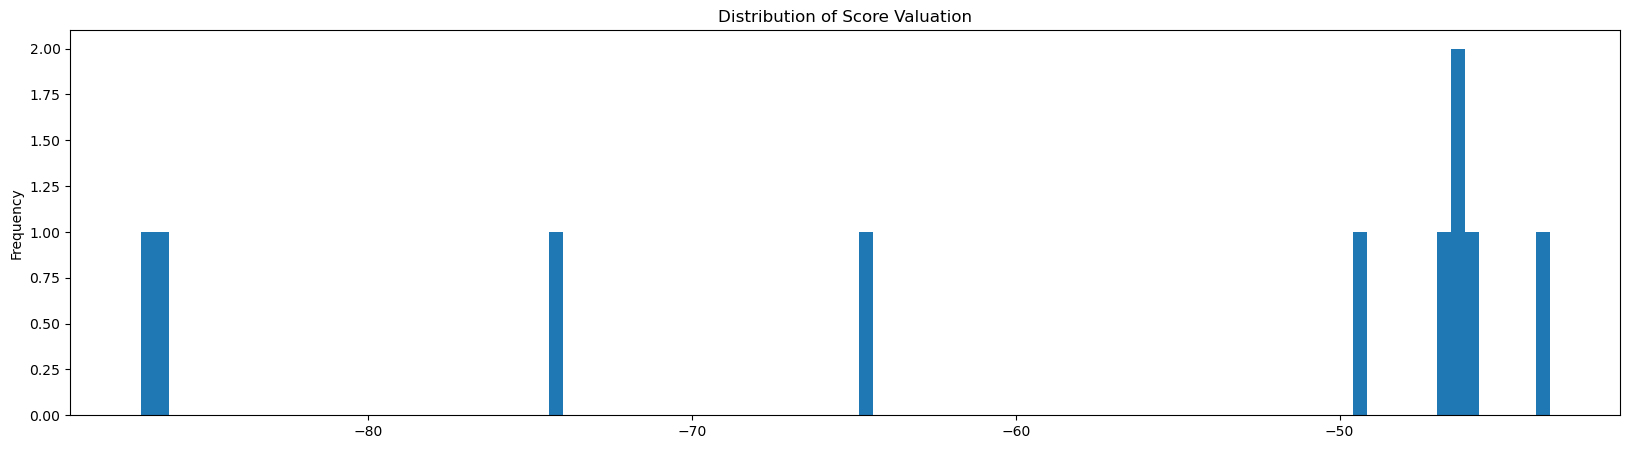

In [32]:
leader_df['score_val'].plot(kind='hist', bins=100,
                     title='Distribution of Score Valuation',
                     figsize=(20, 5))


<Axes: title={'center': 'Fit Analysis'}, xlabel='model', ylabel='score_val'>

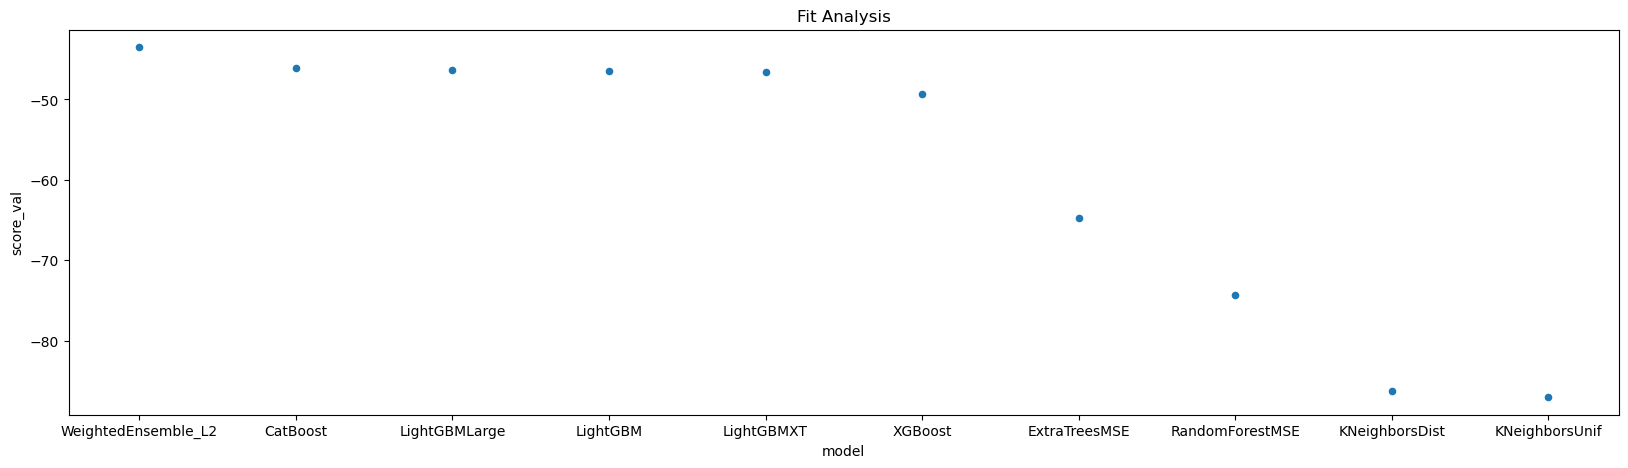

In [26]:
leader_df.plot(kind='scatter', x='model', y='score_val', title='Fit Analysis',figsize=(20, 5))

----
## Conclusion

You have now created a model by using AutoGluon, seen how to identify the best model version, and made predictions by using the model.

## Next lab
In the next lab, you will explore some of the advanced features of AutoGluon to refine your model.